In [1]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_users_2.csv.zip', compression='zip')
sessions_df = pd.read_csv('sessions.csv.zip', compression='zip')

In [3]:
#sessions_df[sessions_df['user_id'] == 'zzvr84im58']

In [4]:
train_df.set_index('id', inplace=True)
sessions_df.set_index('user_id', inplace=True)

In [5]:
users_with_destination = train_df.loc[train_df['country_destination'] != 'NDF']
users_without_destination = train_df.loc[train_df['country_destination'] == 'NDF']

In [6]:
a = users_with_destination.index.values
b = sessions_df.index.unique()
sessions_id = list(set(a).intersection(b))

In [7]:
c = users_without_destination.index.values
d = sessions_df.index.unique()
sessions_id_without = list(set(c).intersection(d))

In [8]:
#check total users
len(sessions_id_without)+len(sessions_id)

73815

In [9]:
users_with_destination_sessions = sessions_df.loc[sessions_id]
users_without_destination_sessions = sessions_df.loc[sessions_id_without]

In [10]:
users_with_destination_sessions.isnull().sum()

action            29434
action_type      281332
action_detail    281332
device_type           0
secs_elapsed      28774
dtype: int64

In [11]:
users_without_destination_sessions.isnull().sum()

action            22098
action_type      338528
action_detail    338528
device_type           0
secs_elapsed      45041
dtype: int64

In [12]:
users_with_destination_sessions.describe()['secs_elapsed']['mean']

22011.132408555997

In [13]:
users_without_destination_sessions.describe()

,secs_elapsed
count,3.012669e+06
mean,1.919015e+04
std,8.850461e+04
min,0.000000e+00
25%,2.190000e+02
50%,1.116000e+03
75%,8.325000e+03
max,1.799977e+06


In [14]:
users_with_destination_sessions

,action,action_type,action_detail,device_type,secs_elapsed
user_id,,,,,
vksaoa0hmk,verify,-unknown-,-unknown-,Mac Desktop,25337.0
vksaoa0hmk,lookup,NaN,NaN,Mac Desktop,36.0
vksaoa0hmk,personalize,data,wishlist_content_update,Mac Desktop,1201.0
vksaoa0hmk,index,view,view_search_results,Mac Desktop,4561.0
vksaoa0hmk,index,view,view_search_results,Mac Desktop,2889.0
...,...,...,...,...,...
rpqv3bq6m3,header_userpic,data,header_userpic,Windows Desktop,1021.0
rpqv3bq6m3,ajax_check_dates,click,change_contact_host_dates,Windows Desktop,62.0
rpqv3bq6m3,index,view,view_search_results,Windows Desktop,10068.0


In [15]:
users_with_destination_sessions['action_detail'].fillna('Not explicitly stated', inplace=True)
users_without_destination_sessions['action_detail'].fillna('Not explicitly stated', inplace=True)

In [16]:
with_details = users_with_destination_sessions.action_detail.value_counts()
with_details  = with_details.reset_index()
with_details.columns = ['action_detail', 'with_count'] 

In [17]:
without_details = users_without_destination_sessions.action_detail.value_counts()
without_details = without_details.reset_index()
without_details.columns = ['action_detail', 'without_count']

In [18]:
all_details = pd.merge(with_details,without_details,how='outer',on='action_detail')
all_details

,action_detail,with_count,without_count
0,view_search_results,390890.0,521897.0
1,Not explicitly stated,281332.0,338528.0
2,-unknown-,268986.0,295817.0
3,p3,256383.0,353725.0
4,wishlist_content_update,211836.0,237917.0
...,...,...,...
124,booking,1.0,1.0
125,host_respond,1.0,1.0
126,special_offer_field,1.0,NaN
127,delete_listing_description,NaN,3.0


In [19]:
all_details = all_details.fillna(0)
all_details['minus'] = all_details['with_count'] - all_details['without_count']
all_details['total'] = all_details['with_count'] + all_details['without_count']
all_details['perccent'] = all_details['minus'] / all_details['total']
all_details = all_details[all_details['total'] > 1000]
all_details

,action_detail,with_count,without_count,minus,total,perccent
0,view_search_results,390890.0,521897.0,-131007.0,912787.0,-0.143524
1,Not explicitly stated,281332.0,338528.0,-57196.0,619860.0,-0.092272
2,-unknown-,268986.0,295817.0,-26831.0,564803.0,-0.047505
3,p3,256383.0,353725.0,-97342.0,610108.0,-0.159549
4,wishlist_content_update,211836.0,237917.0,-26081.0,449753.0,-0.057990
...,...,...,...,...,...,...
73,listing_descriptions,596.0,2203.0,-1607.0,2799.0,-0.574134
74,user_tax_forms,549.0,954.0,-405.0,1503.0,-0.269461
78,instant_book,432.0,788.0,-356.0,1220.0,-0.291803
87,view_listing,267.0,911.0,-644.0,1178.0,-0.546689


In [20]:
all_details.sort_values("perccent",inplace=True, ascending=False)
popular_details = all_details[(all_details['perccent'] > 0.05)]
popular_details

,action_detail,with_count,without_count,minus,total,perccent
37,post_checkout_action,5117.0,625.0,4492.0,5742.0,0.782306
18,p5,24434.0,3427.0,21007.0,27861.0,0.753993
32,pending,7099.0,1009.0,6090.0,8108.0,0.751110
58,message_to_host_change,1979.0,494.0,1485.0,2473.0,0.600485
51,message_to_host_focus,3037.0,901.0,2136.0,3938.0,0.542407
57,at_checkpoint,1982.0,605.0,1377.0,2587.0,0.532277
21,your_trips,14481.0,5494.0,8987.0,19975.0,0.449912
52,request_new_confirm_email,2936.0,1315.0,1621.0,4251.0,0.381322
24,create_phone_numbers,12001.0,5867.0,6134.0,17868.0,0.343295
46,send_message,3665.0,1867.0,1798.0,5532.0,0.325018


In [21]:
popular_details['action_detail']

37           post_checkout_action
18                             p5
32                        pending
58         message_to_host_change
51          message_to_host_focus
57                  at_checkpoint
21                     your_trips
52      request_new_confirm_email
24           create_phone_numbers
46                   send_message
56           listing_reviews_page
42                   apply_coupon
31          cancellation_policies
48                    oauth_login
49                             p4
8                  message_thread
25          profile_verifications
28            update_user_profile
41             profile_references
13                   message_post
14                   edit_profile
71             apply_coupon_click
66             coupon_field_focus
72             apply_coupon_error
44                 oauth_response
22    user_profile_content_update
47                       wishlist
39                  message_inbox
Name: action_detail, dtype: object

In [22]:
#consider actions happended before the completeions of booking

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'post_checkout_action'),
  Text(1, 0, 'p5'),
  Text(2, 0, 'pending'),
  Text(3, 0, 'message_to_host_change'),
  Text(4, 0, 'message_to_host_focus'),
  Text(5, 0, 'at_checkpoint'),
  Text(6, 0, 'your_trips'),
  Text(7, 0, 'request_new_confirm_email'),
  Text(8, 0, 'create_phone_numbers'),
  Text(9, 0, 'send_message'),
  Text(10, 0, 'listing_reviews_page'),
  Text(11, 0, 'apply_coupon'),
  Text(12, 0, 'cancellation_policies'),
  Text(13, 0, 'oauth_login'),
  Text(14, 0, 'p4'),
  Text(15, 0, 'message_thread'),
  Text(16, 0, 'profile_verifications'),
  Text(17, 0, 'update_user_profile'),
  Text(18, 0, 'profile_references'),
  Text(19, 0, 'message_post'),
  Text(20, 0, 'edit_profile'),
  Text(21, 0, 'apply_coupon_click'),
  Text(22, 0, 'coupon_field_focus'),
  Text(23, 0, 'apply_coupon_error'),
  Text(24, 0, 'oauth_response'),
  Text(25, 0, 'user_pro

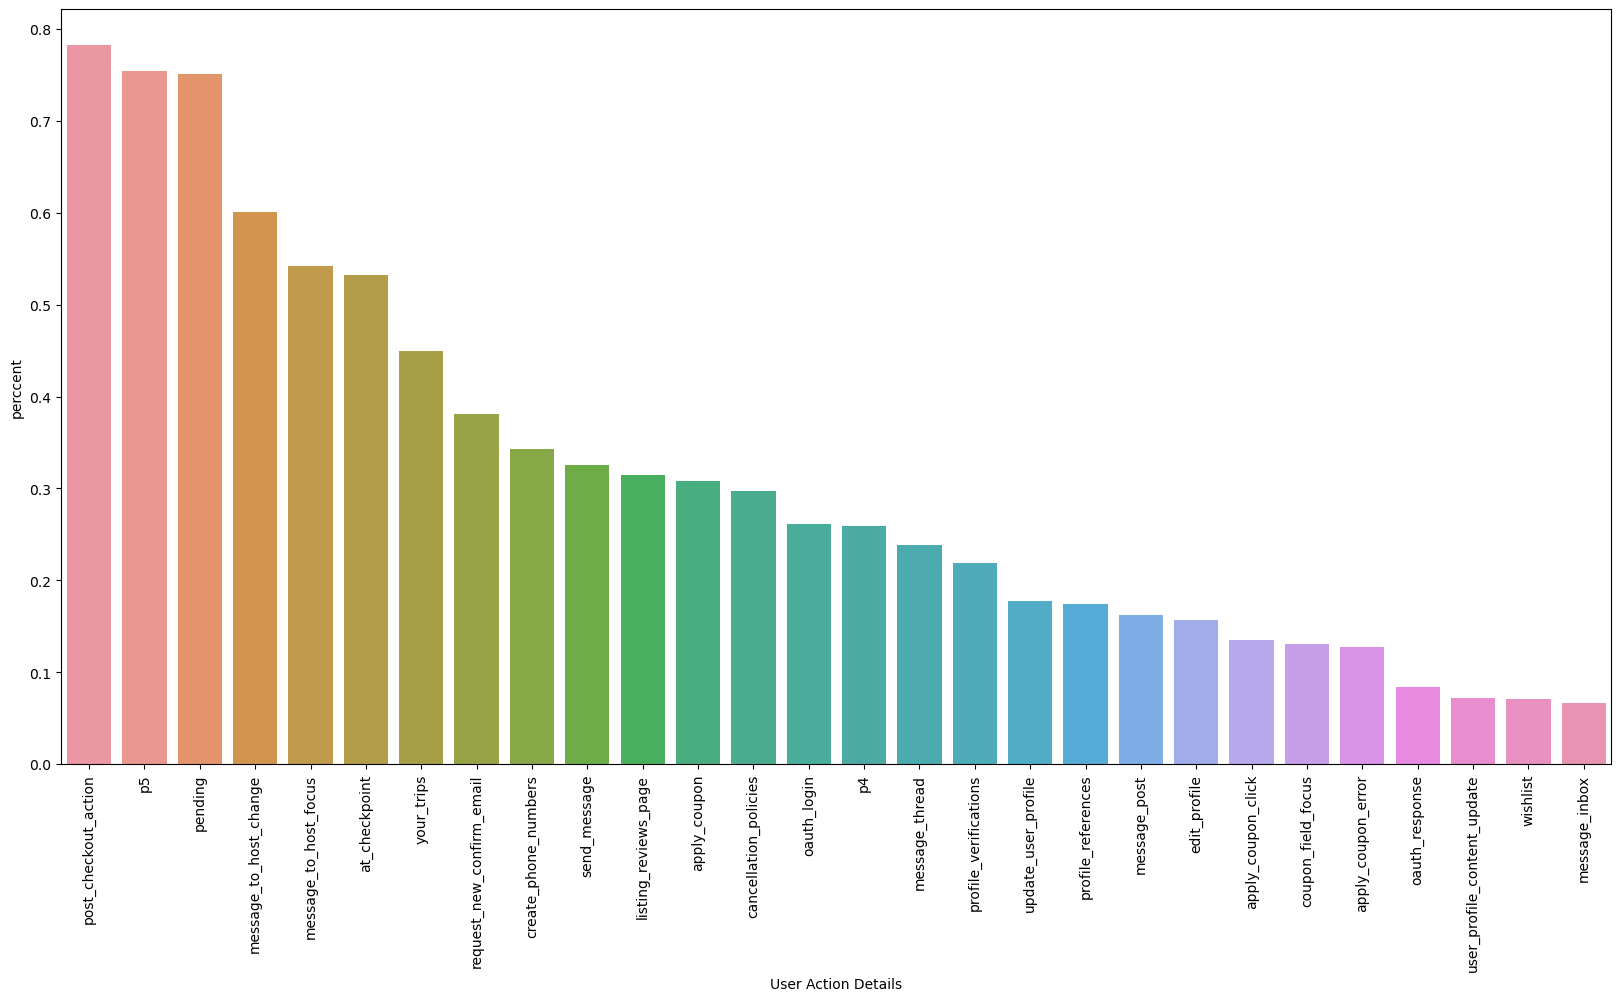

In [43]:
plt.figure(figsize = [20,10],dpi=100)
sns.barplot(x = popular_details['action_detail'], y = popular_details['perccent'])
plt.xlabel('User Action Details')
plt.xticks(rotation=90)

In [24]:
less_popular_details = all_details[(all_details['perccent'] < -0.05)]
less_popular_details 

,action_detail,with_count,without_count,minus,total,perccent
4,wishlist_content_update,211836.0,237917.0,-26081.0,449753.0,-0.057990
1,Not explicitly stated,281332.0,338528.0,-57196.0,619860.0,-0.092272
23,create_user,14309.0,18704.0,-4395.0,33013.0,-0.133129
12,header_userpic,36714.0,48163.0,-11449.0,84877.0,-0.134889
27,login,10241.0,13617.0,-3376.0,23858.0,-0.141504
0,view_search_results,390890.0,521897.0,-131007.0,912787.0,-0.143524
62,login_page,1026.0,1395.0,-369.0,2421.0,-0.152416
3,p3,256383.0,353725.0,-97342.0,610108.0,-0.159549
29,user_listings,8808.0,12823.0,-4015.0,21631.0,-0.185613
40,payment_instruments,3956.0,6274.0,-2318.0,10230.0,-0.226588


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'wishlist_content_update'),
  Text(1, 0, 'Not explicitly stated'),
  Text(2, 0, 'create_user'),
  Text(3, 0, 'header_userpic'),
  Text(4, 0, 'login'),
  Text(5, 0, 'view_search_results'),
  Text(6, 0, 'login_page'),
  Text(7, 0, 'p3'),
  Text(8, 0, 'user_listings'),
  Text(9, 0, 'payment_instruments'),
  Text(10, 0, 'reservations'),
  Text(11, 0, 'user_wishlists'),
  Text(12, 0, 'trip_availability'),
  Text(13, 0, 'user_tax_forms'),
  Text(14, 0, 'book_it'),
  Text(15, 0, 'user_profile'),
  Text(16, 0, 'account_payout_preferences'),
  Text(17, 0, 'user_reviews'),
  Text(18, 0, 'instant_book'),
  Text(19, 0, 'unavailable_dates'),
  Text(20, 0, 'user_social_connections'),
  Text(21, 0, 'update_user'),
  Text(22, 0, 'listing_reviews'),
  Text(23, 0, 'your_listings'),
  Text(24, 0, 'notifications'),
  Text(25, 0, 

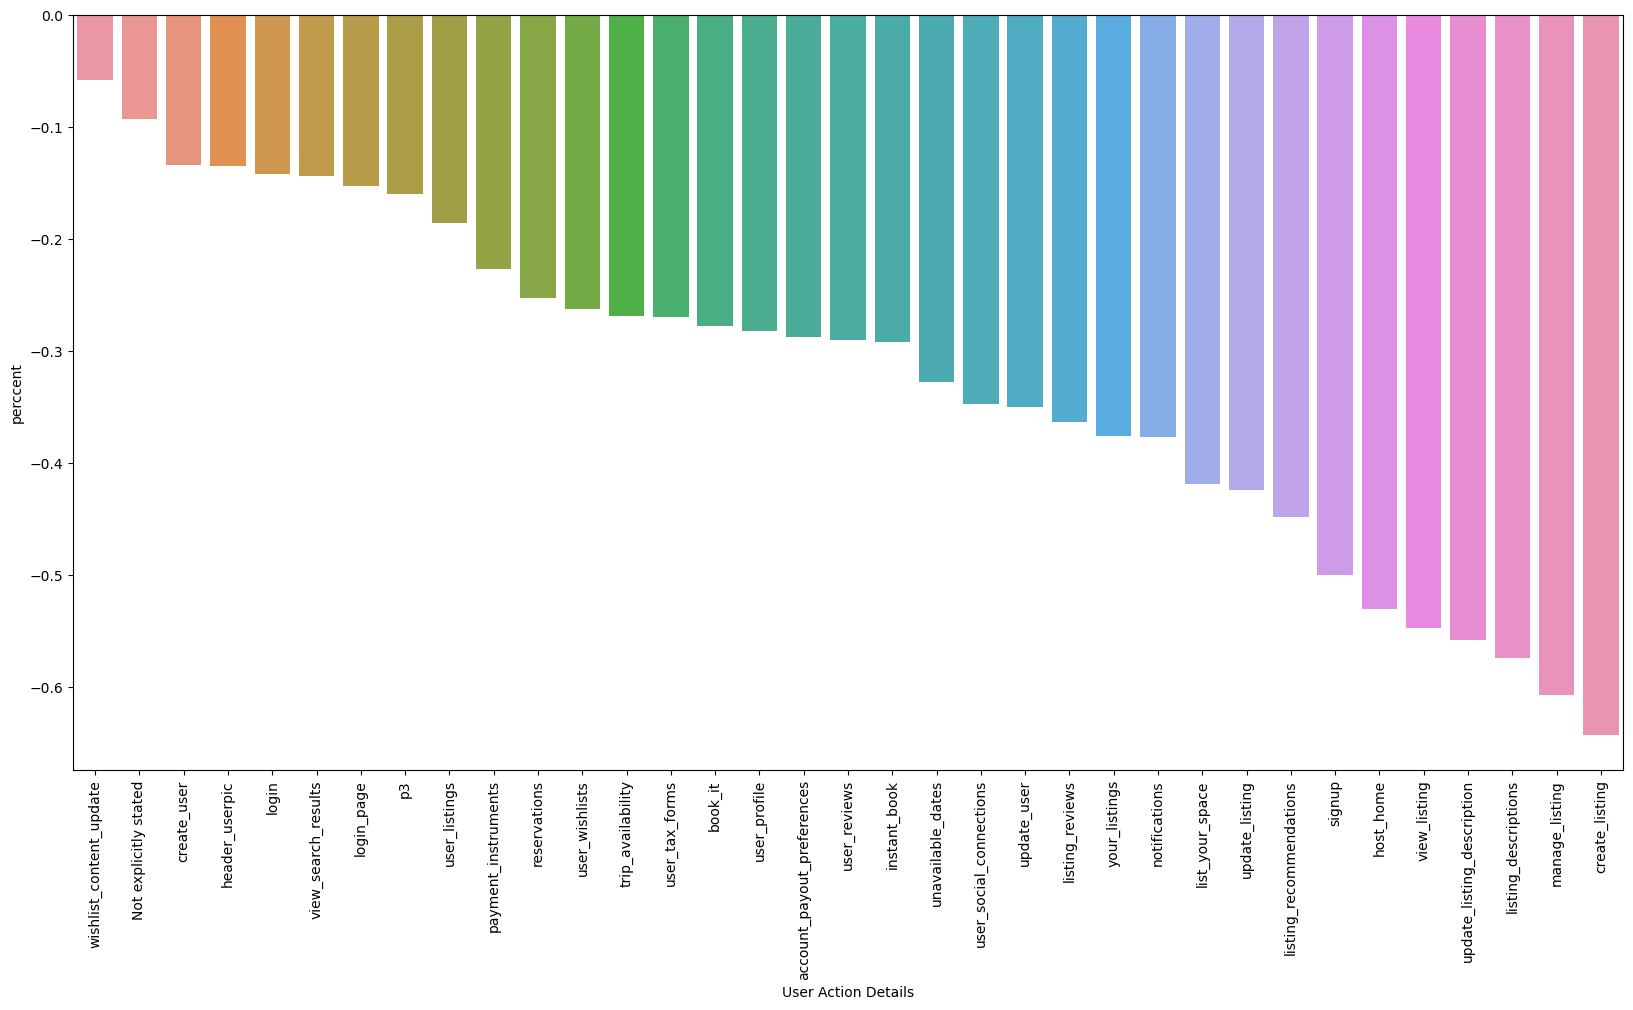

In [44]:
plt.figure(figsize = [20,10],dpi=100)
sns.barplot(x = less_popular_details['action_detail'], y = less_popular_details['perccent'])
plt.xlabel('User Action Details')
plt.xticks(rotation=90)

In [28]:
t= all_details.iloc[all_details['perccent'].abs().argsort()]


In [29]:
t['action_detail'].tail(15).values

array(['listing_recommendations', 'your_trips', 'signup', 'host_home',
       'at_checkpoint', 'message_to_host_focus', 'view_listing',
       'update_listing_description', 'listing_descriptions',
       'message_to_host_change', 'manage_listing', 'create_listing',
       'pending', 'p5', 'post_checkout_action'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'wishlist_content_update'),
  Text(1, 0, 'Not explicitly stated'),
  Text(2, 0, 'create_user'),
  Text(3, 0, 'header_userpic'),
  Text(4, 0, 'login'),
  Text(5, 0, 'view_search_results'),
  Text(6, 0, 'login_page'),
  Text(7, 0, 'p3'),
  Text(8, 0, 'user_listings'),
  Text(9, 0, 'payment_instruments'),
  Text(10, 0, 'reservations'),
  Text(11, 0, 'user_wishlists'),
  Text(12, 0, 'trip_availability'),
  Text(13, 0, 'user_tax_forms'),
  Text(14, 0, 'book_it'),
  Text(15, 0, 'user_profile'),
  Text(16, 0, 'account_payout_preferences'),
  Text(17, 0, 'user_reviews'),
  Text(18, 0, 'instant_book'),
  Text(19, 0, 'unavailable_dates'),
  Text(20, 0, 'user_social_connections'),
  Text(21, 0, 'update_user'),
  Text(22, 0, 'listing_reviews'),
  Text(23, 0, 'your_listings'),
  Text(24, 0, 'notifications'),
  Text(25, 0, 

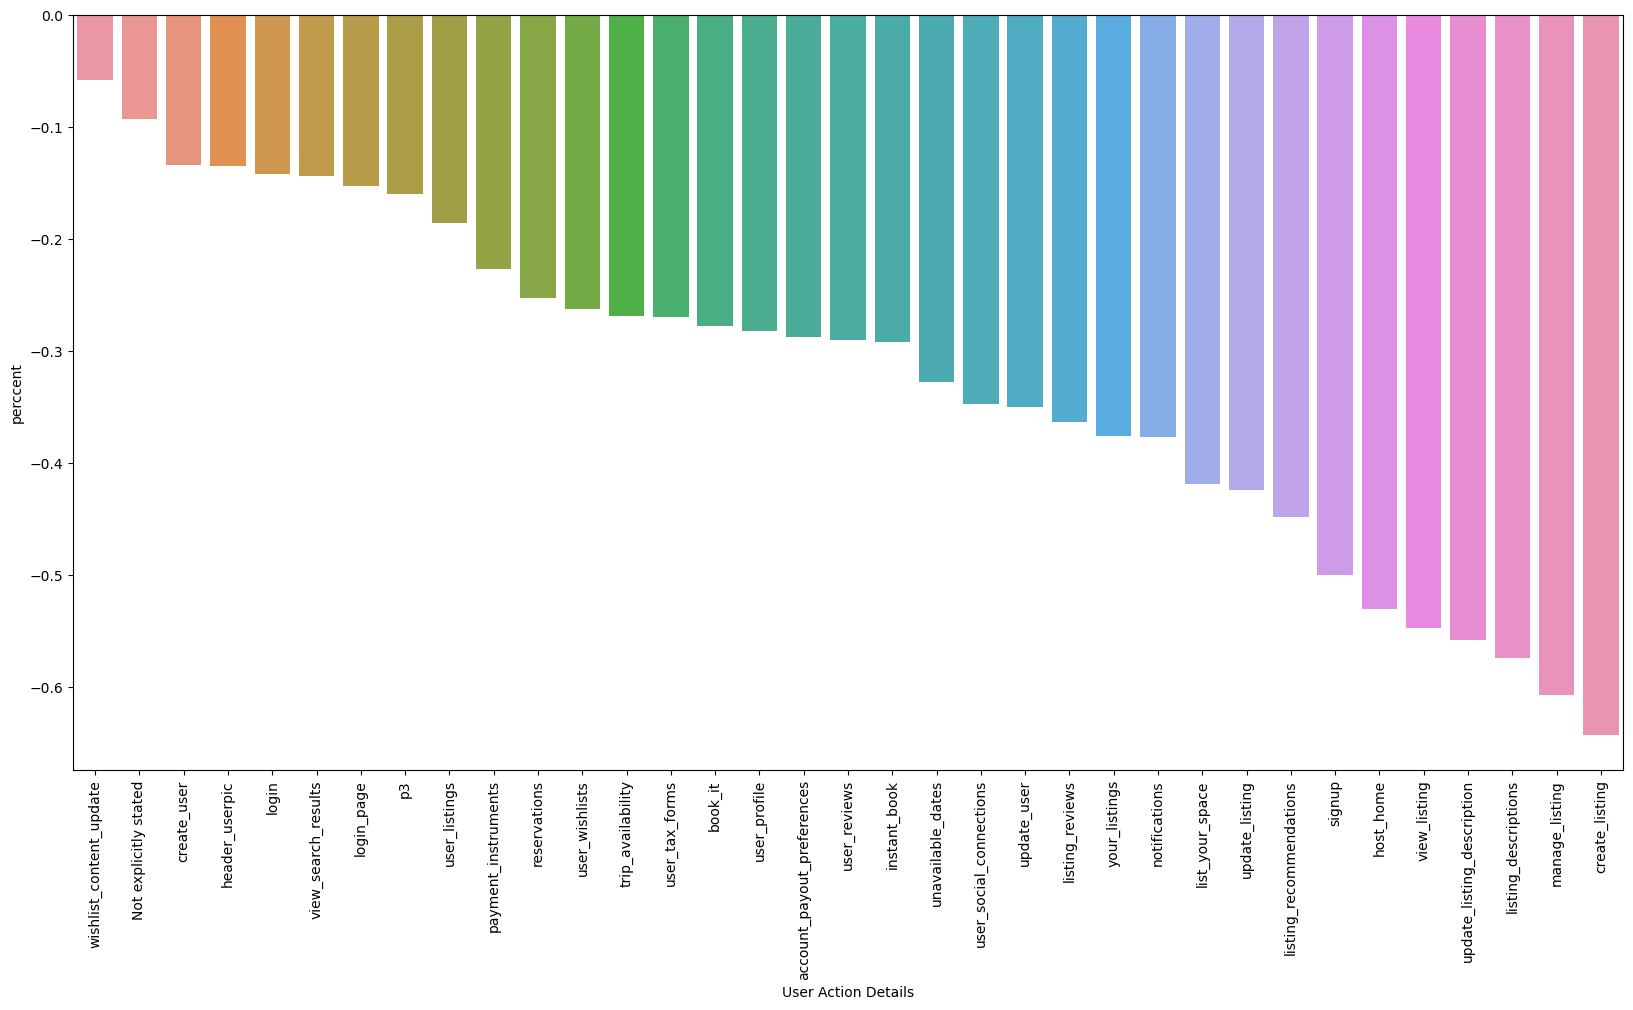

In [45]:
plt.figure(figsize = [20,10],dpi=100)
sns.barplot(x = less_popular_details['action_detail'], y = less_popular_details['perccent'])
plt.xlabel('User Action Details')
plt.xticks(rotation=90)

In [31]:
with_most_used_device = users_with_destination_sessions.groupby('user_id')['device_type'].max().reset_index()
without_most_used_device = users_without_destination_sessions.groupby('user_id')['device_type'].max().reset_index()

In [32]:
with_most_used_device_counts = with_most_used_device.device_type.value_counts().reset_index()
with_most_used_device_counts.columns = ['device_type', 'with_count'] 

In [33]:
without_most_used_device_counts = without_most_used_device.device_type.value_counts().reset_index()
without_most_used_device_counts.columns = ['device_type', 'without_count']

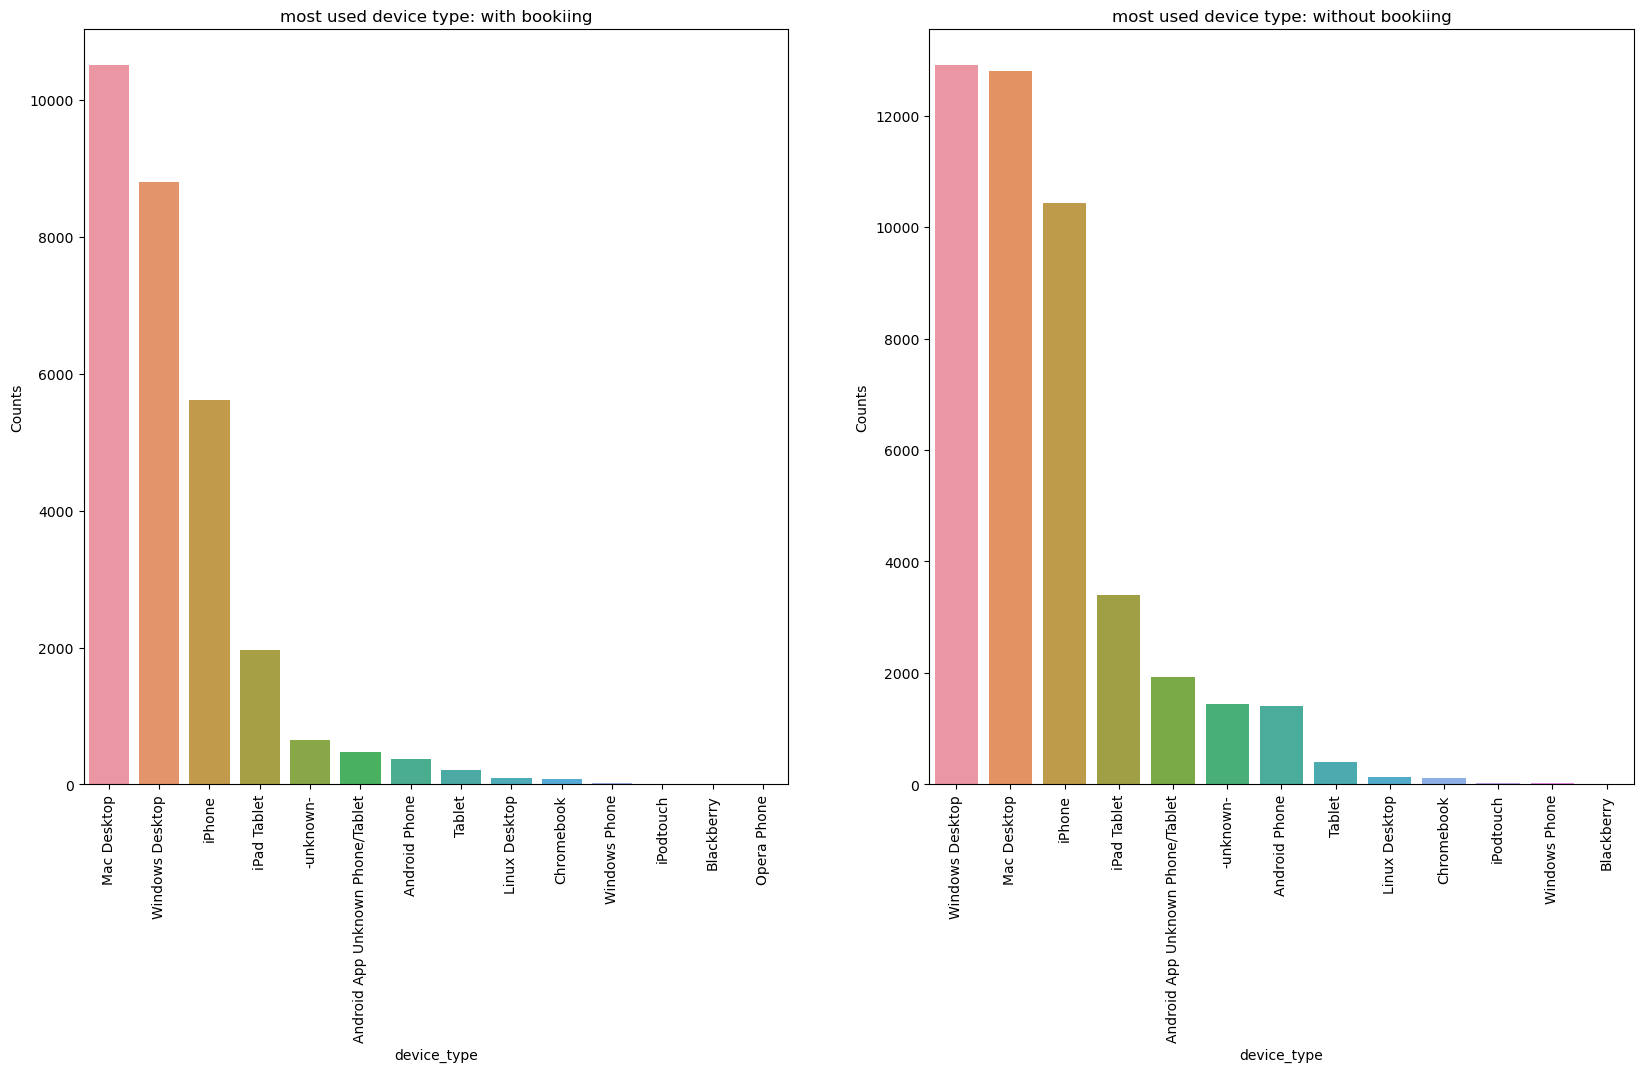

In [46]:
fig, ax =plt.subplots(1,2, figsize=(20,10), dpi=100)
sns.barplot(x = with_most_used_device_counts['device_type'], y = with_most_used_device_counts['with_count'], ax=ax[0])
sns.barplot(x = without_most_used_device_counts['device_type'], y = without_most_used_device_counts['without_count'], ax=ax[1])
ax[0].set_title("most used device type: with bookiing")
ax[1].set_title("most used device type: without bookiing")
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].tick_params('x', labelrotation=90)
ax[1].tick_params('x', labelrotation=90)

In [35]:
users_with_destination_sessions['secs_elapsed'].fillna(0, inplace=True)
users_without_destination_sessions['secs_elapsed'].fillna(0, inplace=True)

In [36]:
with_elapsed = users_with_destination_sessions.groupby(['user_id'])['secs_elapsed'].agg(sum)
with_elapsed  = with_elapsed.reset_index()
with_elapsed.columns = ['user_id', 'with_secs_elapsed']

In [37]:
with_elapsed.describe()['with_secs_elapsed']['mean']

1875293.5566483631

In [38]:
without_elapsed = users_without_destination_sessions.groupby(['user_id'])['secs_elapsed'].agg(sum)
without_elapsed  = without_elapsed.reset_index()
without_elapsed.columns = ['user_id', 'without_secs_elapsed']

In [39]:
with_elapsed.describe()['with_secs_elapsed']['mean']
without_elapsed.describe()['without_secs_elapsed']['mean']

1283576.223862703

In [40]:
without_elapsed.describe()['without_secs_elapsed']['mean']

1283576.223862703

Text(0.5, 0, 'Having a Booking or Not')

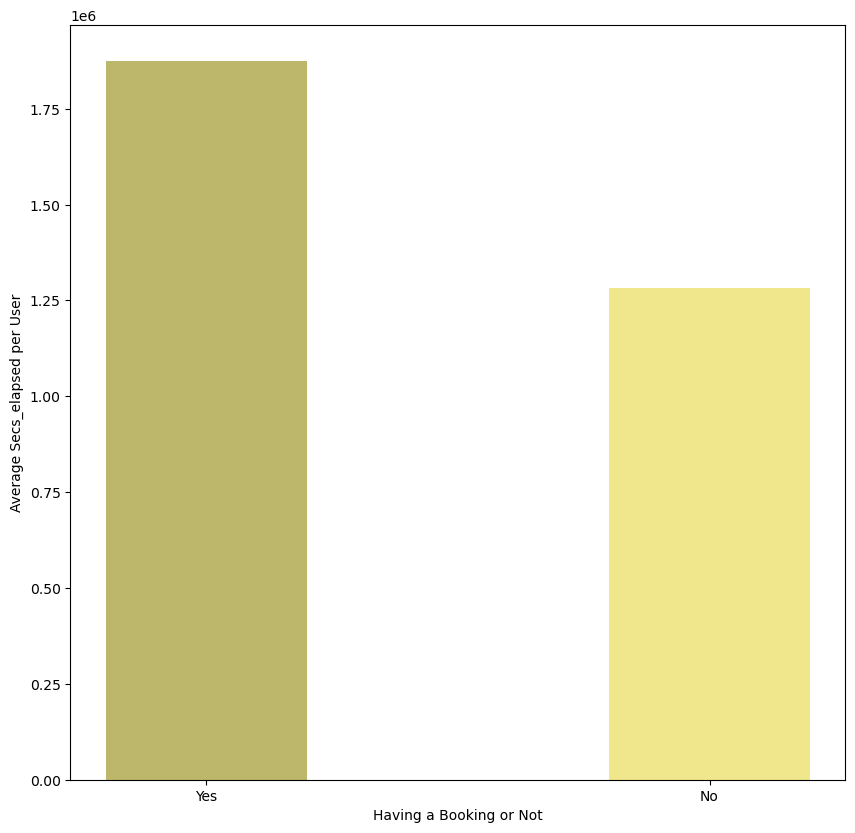

In [41]:
plt.figure(figsize = [10,10],dpi=100)
plt.bar('Yes', with_elapsed.describe()['with_secs_elapsed']['mean'], color = 'darkkhaki', width = 0.4)
plt.bar('No',without_elapsed.describe()['without_secs_elapsed']['mean'], color = 'khaki', width = 0.4)
plt.ylabel('Average Secs_elapsed per User')
plt.xlabel('Having a Booking or Not')